# **Isaias Chavarria Mora -> Proyecto 2**

# Ejercicio 1

Generar una función y utilizar esta para recodificar la variable “país de
origen” (1, 2, 3) en el dataframe a través de la función apply.

In [126]:
import numpy as np
import pandas as pd

# Se descomprime el archivo ZIP
!unzip autos.csv.zip


Archive:  autos.csv.zip
Created by ZIP Extractor v4.50 (https://zipextractor.app)
replace autos.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: autos.csv               


In [127]:
df_autos = pd.read_csv('autos.csv', sep=';')

df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


In [112]:
df_autos.head(15)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0
5,15.0,8,USA,4341,429.0,10.0,ford galaxie 500,1/01/1970,198.0
6,14.0,8,USA,4354,454.0,9.0,chevrolet impala,1/01/1970,220.0
7,14.0,8,USA,4312,440.0,8.5,plymouth fury iii,1/01/1970,215.0
8,14.0,8,USA,4425,455.0,10.0,pontiac catalina,1/01/1970,225.0
9,15.0,8,USA,3850,390.0,8.5,amc ambassador dpl,1/01/1970,190.0


In [113]:
def change_country_value(country_name):
  '''
    Realiza la codificación de la columna país, dependiendo de los valores
    USA = 1
    Europe = 2
    Others = 3

    Parámetros
    ----------------
    country_name: string
  '''
  if(country_name == "USA"):
    return 1
  if(country_name == "Europe"):
    return 2
  return 3

# se aplica la codificación para ver que los valores se cambien correctamente
df_autos["Pais_Origen"].apply(lambda x: change_country_value(x))


0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    2
403    1
404    1
405    1
Name: Pais_Origen, Length: 406, dtype: int64

# Ejercicio 2

Generar un Notebook Colab con código y resultados, que contiene
información de autos de un periodo de tiempo. Resolver los siguientes:
- Limpieza y tratamiento de las variables (Según corresponda)
- Generar 5 nuevas variables aplicando los siguientes criterios con las
variables numéricas:

    1. Log10(var1/var2)
    2. Sqrt(var1)*exp(var2)/200
    3. Si var 1 > var 2 → 5, caso contrario 3
    4. 1/logn(var1/var2)*100
    5. var2**2/var1

In [114]:
# total datos perdidos
pd.DataFrame(df_autos.isna().sum(),
             columns = ['Datos_Perdidos'])

,Datos_Perdidos
Millas_Por_Galon,8
Cilindros,0
Pais_Origen,0
Peso_En_Libras,0
Desplazamiento,0
Aceleracion,0
Nombre,0
Anyo,0
Caballo_De_Fuerza,6


In [115]:
import numpy as np
import pandas as pd

#Variables numericas del DataFrame
#var1 = Millas_Por_Galon
#var2 = Cilindros
#var3 = Peso_En_Libras
#var4 = Desplazamiento
#var5 = Aceleracion
#var6 = Caballo_De_Fuerza

df_autos = (
    df_autos
    .assign (var1 = lambda x: np.log10(x.Millas_Por_Galon/x.Cilindros))
    .assign (var2 = lambda x: np.sqrt(x.Millas_Por_Galon) * np.exp(x.Cilindros)/200)
    .assign (var3 = lambda x: np.where(x.Millas_Por_Galon > x.Cilindros, 5, 3))
    .assign (var4 = lambda x: 1/np.log(x.Millas_Por_Galon/x.Cilindros)*100)
    .assign (var5 = lambda x: x.Cilindros **2 /x.Millas_Por_Galon)
)

df_autos.head(10)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,var1,var2,var3,var4,var5
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,0.352183,63.235668,5,123.315173,3.555556
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,0.273001,57.726003,5,159.081487,4.266667
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,0.352183,63.235668,5,123.315173,3.555556
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,0.301030,59.619160,5,144.269504,4.000000
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,0.327359,61.454023,5,132.666146,3.764706
5,15.0,8,USA,4341,429.0,10.0,ford galaxie 500,1/01/1970,198.0,0.273001,57.726003,5,159.081487,4.266667
6,14.0,8,USA,4354,454.0,9.0,chevrolet impala,1/01/1970,220.0,0.243038,55.768617,5,178.694029,4.571429
7,14.0,8,USA,4312,440.0,8.5,plymouth fury iii,1/01/1970,215.0,0.243038,55.768617,5,178.694029,4.571429
8,14.0,8,USA,4425,455.0,10.0,pontiac catalina,1/01/1970,225.0,0.243038,55.768617,5,178.694029,4.571429
9,15.0,8,USA,3850,390.0,8.5,amc ambassador dpl,1/01/1970,190.0,0.273001,57.726003,5,159.081487,4.266667


# Ejercicio 3

Crear una función que permita generar 3 variables **cualitativas**
ordinales a partir de las variables numéricas con los siguientes criterios:

★ Si es mayor a la “media + 1*desviación estándar” → Alto

★ Si está entre “media - 1*desviación estándar” y “media + 1*desviación
 estándar” → Medio

★ Si es menor a la “media - 1*desviación estándar” → Bajo

**Nota:** Mostrar con las nuevas variables generadas.
Elegir con libertad las variables a trabajar.
La función debe contar con su respectiva documentación.

In [129]:
import numpy as np
import pandas as pd

#Variables Elegidas (Se pueden elegir cualesquiera 3 variables de las numericas)
#var1 = Desplazamiento
#var2 = Aceleracion
#var3 = Caballo_De_Fuerza

def CalcularQualit(rowValue, mean, standarDev):
  '''
    Recibe una un valor de la columna del DataFrame y calcula:
      En caso de: rowValue > mean + 1 * standarDev = "Alto"
      En caso de: (mean - 1 * standarDev) <= rowValue <= (mean + 1 * standarDev) = "Medio"
      En caso de: rowValue < (mean - 1 * standarDev) = "Bajo"

      Parámetros
      ---------------
      rowValue: float
      mean: float
      standarDev: float
  '''
  if(rowValue > (mean + 1 * standarDev)):
    return "Alto"
  if((mean - 1 * standarDev) <= rowValue <= (mean + 1 * standarDev)):
    return "Medio"
  if(rowValue < (mean - 1 * standarDev)):
    return "Bajo"

#Se obtienen los parámetros de cada una de las columnas, para calcular las fórmulas
meanDesplazamiento = df_autos['Desplazamiento'].mean()
standarDevDesplazamiento = df_autos['Desplazamiento'].std()

meanAceleracion = df_autos['Aceleracion'].mean()
standarDevAceleracion = 1 * df_autos['Aceleracion'].std()

meanCaballo_De_Fuerza = df_autos['Caballo_De_Fuerza'].mean()
standarDevCaballo_De_Fuerza = 1 * df_autos['Caballo_De_Fuerza'].std()

df_autos = (
    df_autos
    .assign(Qualitativa_1 = df_autos["Desplazamiento"].apply(lambda x: CalcularQualit(x,meanDesplazamiento, standarDevDesplazamiento)))
    .assign(Qualitativa_2 = df_autos["Aceleracion"].apply(lambda x: CalcularQualit(x,meanAceleracion, standarDevAceleracion)))
    .assign(Qualitativa_3 = df_autos["Caballo_De_Fuerza"].apply(lambda x: CalcularQualit(x,meanCaballo_De_Fuerza, standarDevCaballo_De_Fuerza)))
)

df_autos.head(50)


,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Qualitativa_1,Qualitativa_2,Qualitativa_3
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,Alto,Bajo,Medio
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,Alto,Bajo,Alto
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,Alto,Bajo,Alto
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,Alto,Bajo,Alto
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,Alto,Bajo,Medio
5,15.0,8,USA,4341,429.0,10.0,ford galaxie 500,1/01/1970,198.0,Alto,Bajo,Alto
6,14.0,8,USA,4354,454.0,9.0,chevrolet impala,1/01/1970,220.0,Alto,Bajo,Alto
7,14.0,8,USA,4312,440.0,8.5,plymouth fury iii,1/01/1970,215.0,Alto,Bajo,Alto
8,14.0,8,USA,4425,455.0,10.0,pontiac catalina,1/01/1970,225.0,Alto,Bajo,Alto
9,15.0,8,USA,3850,390.0,8.5,amc ambassador dpl,1/01/1970,190.0,Alto,Bajo,Alto


#Ejercicion 4

Crear una función que muestre los siguientes gráficos
(simultáneamente) para las variables numéricas, según una variable
cualitativa:

❖ Cajas y bigotes

❖ Barras de la media

❖ Histograma con densidad (Curva)

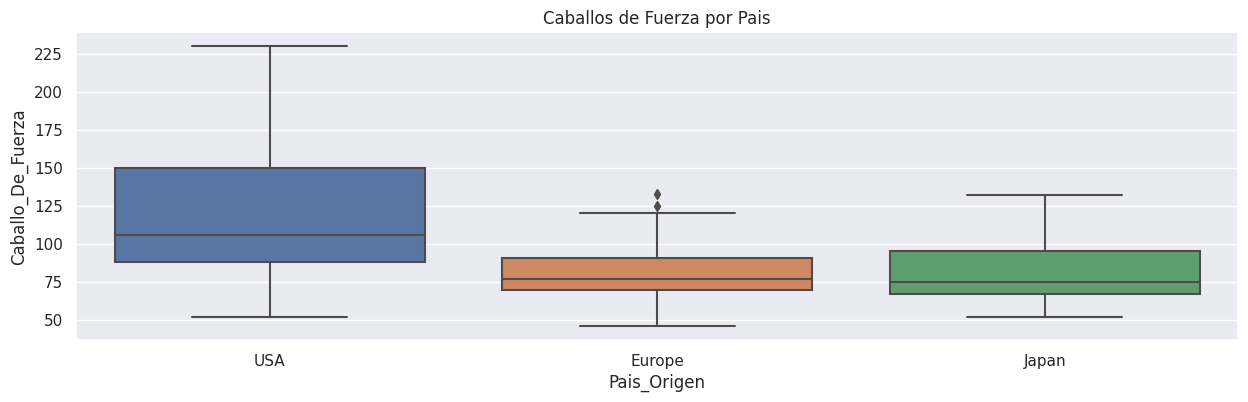

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import missingno as msno

df_caballos_fuerza = df_autos.loc[:, ['Caballo_De_Fuerza', 'Pais_Origen']]

fig, ax = plt.subplots(figsize=(15, 4))

sns.boxplot(
        x     = 'Pais_Origen',  #Cualitativa
        y     = 'Caballo_De_Fuerza', #Cuantitativa
        data  = df_caballos_fuerza,
        ax    = ax
    )

ax.set_title('Caballos de Fuerza por Pais');

In [57]:
# gráfico de barras de las frecuencias
plot_caballos_fuerza= pd.crosstab(df_autos['Pais_Origen'], df_autos['Cilindros'],
                         rownames = ["Pais"],
                         colnames = ["Cilindros"],
                         aggfunc = "mean",
                         values = df_autos['Caballo_De_Fuerza']
).round(2)

plot_caballos_fuerza

Cilindros,3,4,5,6,8
Pais,,,,,
Europe,NaN,78.91,82.33,113.50,NaN
Japan,99.25,75.58,NaN,115.83,NaN
USA,NaN,80.96,NaN,99.67,158.45


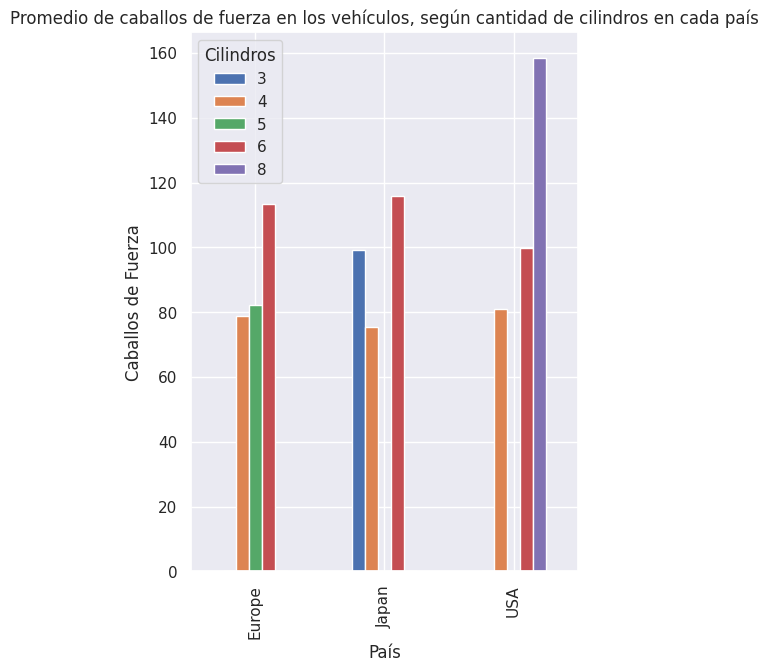

In [132]:
graphic = plot_caballos_fuerza.plot.bar()

graphic.set(title='Promedio de caballos de fuerza en los vehículos, según cantidad de cilindros en cada país')
graphic.set_ylabel('Caballos de Fuerza')
graphic.set_xlabel('País')

paises = ('Europe', 'Japan', 'USA')
y_pos = np.arange(len(paises))
plt.xticks(y_pos, paises)

#plt.legend(['No riesgoso', 'Riesgoso'], bbox_to_anchor=(1.0, 0.7))
plt.show()

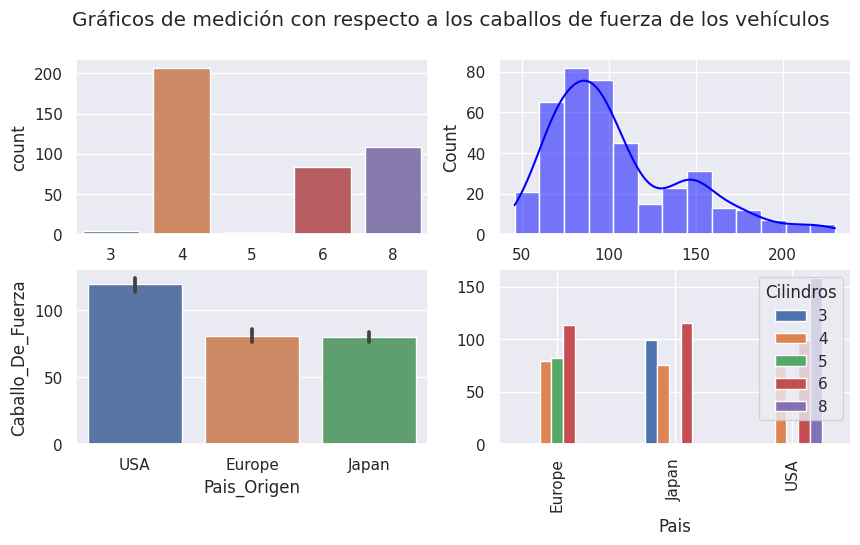

In [123]:
import seaborn as sns
import pandas as pd


def GenerateGraphics(df_data, graphicTitle):
  '''
    función que genera los gráficos correspondientes del DataFrame autos, para poder
    mostrar un análisis de los distintos conteos tanto de la Cilindrada como de los caballos de fuerza de los
    vehículos, por las distintas zonas de Origen

    Parámetros
    --------------------
    df_data: DataFrame
    graphicTitle: string
  '''
  # Se crea una tabla con las variables para el grafico de barras
  plot_caballos_fuerza= pd.crosstab(df_autos['Pais_Origen'], df_autos['Cilindros'],
                          rownames = ["Pais"],
                          colnames = ["Cilindros"],
                          aggfunc = "mean",
                          values = df_autos['Caballo_De_Fuerza']
  ).round(2)

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))  # 1 Fila [0]
  fig.suptitle(graphicTitle)

  #Se crean los graficos
  sns.countplot(x='Cilindros', data=df_data, ax=axes[0,0])
  sns.histplot(x='Caballo_De_Fuerza', data=df_data, kde=True, color="blue", ax=axes[0,1])
  sns.barplot(x ="Pais_Origen" , y ="Caballo_De_Fuerza" ,
            estimator = np.mean,
            data=df_data, ax=axes[1,0])
  plot_caballos_fuerza.plot.bar(ax=axes[1,1])


# se hace el llamado a la función
GenerateGraphics(df_autos, "Gráficos de medición con respecto a los caballos de fuerza de los vehículos")


# Ejercicio 5

Crear una función que devuelva un mapa de calor con la correlación
de todas las variables numéricas (incluye las generadas), para cada
país.

<ipython-input-124-b3139a95a87e>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df_data.corr()


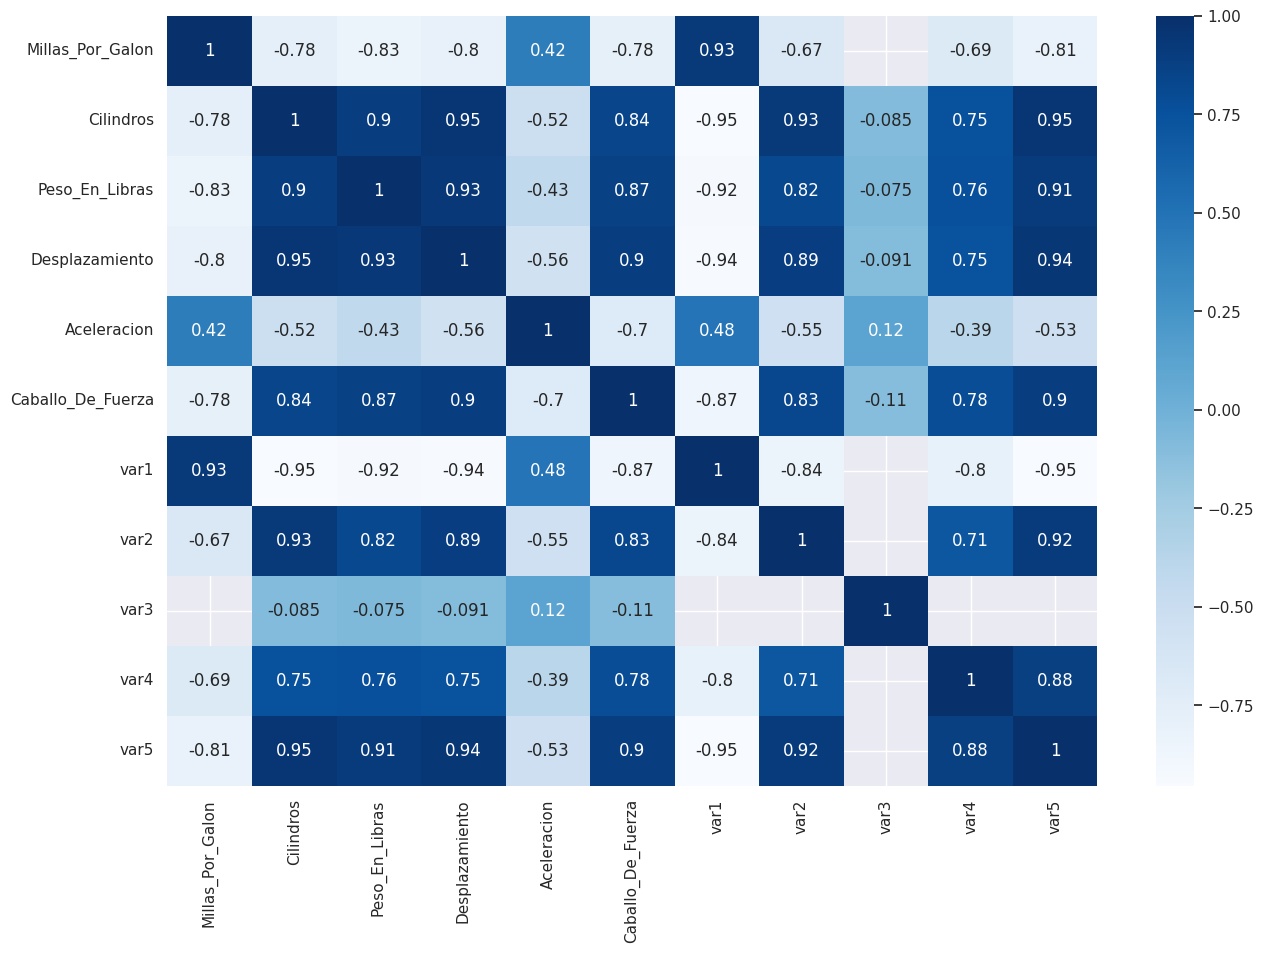

In [124]:
def GenerateHeatMap(df_data, colors):
  '''
  función que genera un mapa de calor para el Dataframe,
  utilizando todas las columnas del mismo

  Parámetros
  --------------------
  df_data: DataFrame
  colors: string or array
  '''
  plt.figure(figsize=(15,10))
  correlacion = df_data.corr()

  sns.heatmap(correlacion,
            xticklabels = correlacion.columns.values,
            yticklabels = correlacion.columns.values,
            annot = True,
            cmap = colors
            );

GenerateHeatMap(df_autos, 'Blues')